 # NLP_LDA_Topic_Modelling.ipynb


## How to Convert PDF to Text in Python? (Recardian PDF file to Text file)

In [ ]:
## Installing aspose-words package

pip install aspose-words

### DOC = aw.Document("Inputing PDF")
### doc.sav(saving output)
import aspose.words as aw

doc = aw.Document("C:/Users/seungchanlim/Desktop/22-23_Masters/Hackathon/THE SCHEME FOR CONSTRUCTION CONTRACTS_PAYMENT.pdf")
doc.save("C:/Users/seungchanlim/Desktop/22-23_Masters/Hackathon/scheme.txt")

In [ ]:
pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 67.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.0 which is incompatible.


In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re
import pyLDAvis
import pyLDAvis.gensim

import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Only Colab Usage (not necessary)
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving scheme.txt to scheme.txt


---------


In [ ]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Plotting tools
import pyLDAvis
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tweet = pd.read_csv('scheme.txt', on_bad_lines='skip')
tweet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document Generated: 2017-09-26
0,Evaluation Only. Created with Aspose.Words. Co...
1,Status: This is the original version (as it wa...
2,SCHEDULE
3,THE SCHEME FOR CONSTRUCTION CONTRACTS
4,PART II—
5,PAYMENT
6,Entitlement to and amount of stage payments
7,1. Where the parties to a relevant constructio...
8,the relevant provisions of paragraphs 2 to 4 b...
9,2.—(1) The amount of any payment by way of in...


In [ ]:
tweet = tweet.rename(columns={'Document Generated: 2017-09-26': 'scheme'})
tweet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,scheme
0,Evaluation Only. Created with Aspose.Words. Co...
1,Status: This is the original version (as it wa...
2,SCHEDULE
3,THE SCHEME FOR CONSTRUCTION CONTRACTS
4,PART II—
5,PAYMENT
6,Entitlement to and amount of stage payments
7,1. Where the parties to a relevant constructio...
8,the relevant provisions of paragraphs 2 to 4 b...
9,2.—(1) The amount of any payment by way of in...


In [ ]:
# Convert to list
data = tweet.scheme.tolist()
# Remove Emails
data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub(r"\'", "", sent) for sent in data]
pprint(data[:1])

['Evaluation Only. Created with Aspose.Words. Copyright 2003-2023 Aspose Pty '
 'Ltd.']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(data))
print(data_words[:1])

[['evaluation', 'only', 'created', 'with', 'aspose', 'words', 'copyright', 'aspose', 'pty', 'ltd']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def lemmatization(texts, allowed_postags=['NOUN']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


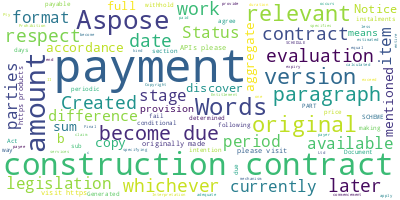

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(tweet['scheme'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'pty', 'ltd', 'full', 'please', 'making','made', 'originally', 'following', 'https', 'become', 'whichever', 'created', 'discover', 'shall', 'relevant', 'ii', 'later'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]
data = tweet.scheme.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['evaluation', 'aspose', 'words', 'copyright', 'aspose']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 1), (3, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from pprint import pprint
# number of topics
num_topics = 6
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.135*"original" + 0.069*"item" + 0.069*"available" + 0.069*"status" + '
  '0.069*"legislation" + 0.069*"currently" + 0.069*"version" + 0.069*"format" '
  '+ 0.025*"claim" + 0.025*"payee"'),
 (1,
  '0.091*"construction" + 0.091*"contract" + 0.046*"words" + 0.046*"aspose" + '
  '0.024*"payment" + 0.024*"evaluation" + 0.024*"work" + 0.024*"copy" + '
  '0.024*"versions" + 0.024*"visit"'),
 (2,
  '0.068*"contract" + 0.068*"period" + 0.037*"amount" + 0.037*"respect" + '
  '0.037*"payable" + 0.037*"specifies" + 0.037*"end" + 0.037*"sum" + '
  '0.037*"commencement" + 0.037*"provisions"'),
 (3,
  '0.079*"amount" + 0.046*"payment" + 0.046*"aspose" + 0.035*"contract" + '
  '0.035*"construction" + 0.035*"paragraph" + 0.035*"accordance" + '
  '0.035*"payments" + 0.035*"stage" + 0.035*"words"'),
 (4,
  '0.071*"work" + 0.071*"mentioned" + 0.053*"document" + 0.052*"generated" + '
  '0.038*"payment" + 0.038*"due" + 0.038*"section" + 0.038*"means" + '
  '0.038*"act" + 0.038*"paragraph"'),
 (5,


In [ ]:
from google.colab import drive
drive.mount('/content/HACK19')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/HACK19


In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
import os


# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/HACK19/MyDrive/HACK19'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/HACK19/MyDrive/HACK19'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.130899 -0.105558       1        1  35.097730
3     -0.114305 -0.024860       2        1  21.517984
5      0.009825  0.176170       3        1  14.292939
0      0.233042 -0.081514       4        1  13.213451
2     -0.004625 -0.030848       5        1   8.085240
4      0.006961  0.066611       6        1   7.792657, topic_info=          Term       Freq      Total Category  logprob  loglift
17     payment  11.000000  11.000000  Default  30.0000  30.0000
9     original   4.000000   4.000000  Default  29.0000  29.0000
23    contract  11.000000  11.000000  Default  28.0000  28.0000
18      amount   5.000000   5.000000  Default  27.0000  27.0000
88        work   3.000000   3.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
31  difference   0.103849   2.427142   Topic6  -5.2059  -0.5995
15      scheme   0.103821   2.598828   Topic6  -5.2062  -0.6682
9     original   0.103805   4.913225   Topic6  -5.2063  -1.3052
14   contracts   0.103747   2.598495   Topic6  -5.2069  -0.6687
71        date   0.103713   2.362541   Topic6  -5.2072  -0.5739

[287 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
29        2  0.824201  accordance
79        3  0.492611         act
79        6  0.492611         act
52        1  0.606628    adequate
39        2  0.370097   aggregate
...     ...       ...         ...
78        3  0.940914    withhold
3         1  0.641777       words
3         2  0.320889       words
88        1  0.521216        work
88        6  0.260608        work

[134 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 6, 1, 3, 5])